In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_excel('C:\\Users\\Emre\\OneDrive\\Desktop\\Pusula Talent\\side_effect_data 1.xlsx')

In [3]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [4]:
df.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [6]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [7]:
df['Cinsiyet'].fillna('Cinsiyet Tanımlanmamış', inplace=True)

In [8]:
gender_distribution = df['Cinsiyet'].value_counts(normalize=True)*100

In [9]:
gender_distribution

Cinsiyet
Female                    36.996182
Cinsiyet Tanımlanmamış    33.008061
Male                      29.995757
Name: proportion, dtype: float64

In [10]:
df['Il'].fillna('Bilinmiyor', inplace=True)

In [11]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                              0
Dogum_Tarihi                          0
Uyruk                                 0
Il                                    0
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [12]:
df['Kronik Hastaliklarim'].fillna('Bilinen Kronik Rahatsızlığı Yok' , inplace=True)

In [13]:
df['Kronik Hastaliklarim'] = df['Kronik Hastaliklarim'].str.split(',')

In [14]:
df_exploded = df.explode('Kronik Hastaliklarim')

In [15]:
df_exploded['Kronik Hastaliklarim'] = df_exploded['Kronik Hastaliklarim'].str.strip()

In [16]:
hastalik_dagilimi = df_exploded['Kronik Hastaliklarim'].value_counts()
print(hastalik_dagilimi)

Kronik Hastaliklarim
Hipertansiyon                      461
KOAH                               421
Diyabet                            396
Bilinen Kronik Rahatsızlığı Yok    392
Kan Hastaliklari                   383
Alzheimer                          343
Kalp Hastaliklari                  327
Guatr                              305
Astim                              296
Kemik Erimesi                      291
Kanser                             273
Diger                              248
Name: count, dtype: int64


In [17]:
df['Il'].value_counts()

Il
Bilinmiyor    227
Adana         220
Mersin        207
Trabzon       195
Canakkale     179
Ankara        179
Eskisehir     174
Antalya       171
Bursa         169
Samsun        153
Istanbul      144
Izmir         121
Malatya       109
Kayseri       109
Name: count, dtype: int64

In [18]:
df['Kronik Hastaliklarim']

0       [Hipertansiyon,  Kan Hastaliklari]
1        [Bilinen Kronik Rahatsızlığı Yok]
2            [Kalp Hastaliklari,  Diyabet]
3                        [Diyabet,  Diger]
4            [Diyabet,  Kalp Hastaliklari]
                       ...                
2352     [Bilinen Kronik Rahatsızlığı Yok]
2353     [Bilinen Kronik Rahatsızlığı Yok]
2354                        [Guatr,  KOAH]
2355                   [Alzheimer,  Diger]
2356                   [Alzheimer,  Diger]
Name: Kronik Hastaliklarim, Length: 2357, dtype: object

In [19]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                              0
Dogum_Tarihi                          0
Uyruk                                 0
Il                                    0
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                  0
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [20]:
df['Alerjilerim'].fillna('Bilinen Alerjisi Yok' , inplace=True)

In [21]:
df['Alerjilerim']

0                      Ceviz
1                        Toz
2                        Muz
3                     Pancar
4       Bilinen Alerjisi Yok
                ...         
2352           Ispanakgiller
2353               Istiridye
2354           Deniz Urunler
2355           Sari Kantaron
2356    Bilinen Alerjisi Yok
Name: Alerjilerim, Length: 2357, dtype: object

In [22]:
df['Alerjilerim'].value_counts()

Alerjilerim
Bilinen Alerjisi Yok    484
Domates                 118
Karaciger               109
Pancar                  100
Balik                    98
Havyar                   97
Ispanakgiller            95
Kefir                    91
Kopek                    91
Yogurt                   89
Deniz Urunler            87
Muz                      81
Kabak Cekirdegi          77
Kahve                    76
Sari Kantaron            75
Toz                      70
Laktoz                   60
Bugday                   55
Cikolata                 53
Elma                     53
Ispanak                  48
Istiridye                46
Bal                      43
Kedi                     38
Lateks                   32
Ceviz                    30
Sut                      27
Kakao                    22
Kolali Icecek            12
Name: count, dtype: int64

In [23]:
df['Baba Kronik Hastaliklari'].fillna('Bilinen Kronik Rahatsızlığı Yok' , inplace=True)
df['Baba Kronik Hastaliklari'] = df['Baba Kronik Hastaliklari'].str.split(',')
df_exploded2 = df.explode('Baba Kronik Hastaliklari')
df_exploded2['Baba Kronik Hastaliklari'] = df_exploded2['Baba Kronik Hastaliklari'].str.strip()
df_exploded2 = df_exploded2[df_exploded2['Baba Kronik Hastaliklari'] != '']
baba_hastalik_dagilimi = df_exploded2['Baba Kronik Hastaliklari'].value_counts()
print(baba_hastalik_dagilimi)

Baba Kronik Hastaliklari
Kemik Erimesi                      439
Kanser                             437
Hipertansiyon                      408
Kan Hastaliklari                   377
KOAH                               365
Kalp Hastaliklari                  358
Alzheimer                          333
Guatr                              331
Diyabet                            323
Astim                              310
Diger                              230
Bilinen Kronik Rahatsızlığı Yok    156
Name: count, dtype: int64


In [24]:
df.isnull().sum()

Kullanici_id                          0
Cinsiyet                              0
Dogum_Tarihi                          0
Uyruk                                 0
Il                                    0
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                           0
Kronik Hastaliklarim                  0
Baba Kronik Hastaliklari              0
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [25]:
df['Anne Kronik Hastaliklari'].fillna('Bilinen Kronik Rahatsızlığı Yok' , inplace=True)
df['Anne Kronik Hastaliklari'] = df['Anne Kronik Hastaliklari'].str.split(',')
df_exploded3 = df.explode('Anne Kronik Hastaliklari')
df_exploded3['Anne Kronik Hastaliklari'] = df_exploded3['Anne Kronik Hastaliklari'].str.strip()
df_exploded3 = df_exploded3[df_exploded3['Anne Kronik Hastaliklari'] != '']
anne_hastalik_dagilimi = df_exploded3['Anne Kronik Hastaliklari'].value_counts()
print(anne_hastalik_dagilimi)

Anne Kronik Hastaliklari
Kalp Hastaliklari                  473
Astim                              472
Alzheimer                          413
Kemik Erimesi                      378
Hipertansiyon                      355
Guatr                              344
KOAH                               321
Kan Hastaliklari                   302
Diyabet                            269
Kanser                             261
Bilinen Kronik Rahatsızlığı Yok    217
Diger                              204
Name: count, dtype: int64


In [26]:
df['Kiz Kardes Kronik Hastaliklari'].fillna('Bilinen Kronik Rahatsızlığı Yok', inplace=True)
df['Kiz Kardes Kronik Hastaliklari'] = df['Kiz Kardes Kronik Hastaliklari'].str.split(',')
df_exploded4 = df.explode('Kiz Kardes Kronik Hastaliklari')
df_exploded4['Kiz Kardes Kronik Hastaliklari'] = df_exploded4['Kiz Kardes Kronik Hastaliklari'].str.strip()
df_exploded4 = df_exploded4[df_exploded4['Kiz Kardes Kronik Hastaliklari'] != '']
kizkardes_hastalik_dagilimi = df_exploded4['Kiz Kardes Kronik Hastaliklari'].value_counts()
print(kizkardes_hastalik_dagilimi)


Kiz Kardes Kronik Hastaliklari
Alzheimer                          444
Kemik Erimesi                      431
Astim                              421
Kan Hastaliklari                   402
Diyabet                            379
Kanser                             351
Guatr                              323
Hipertansiyon                      322
KOAH                               314
Kalp Hastaliklari                  227
Diger                              173
Bilinen Kronik Rahatsızlığı Yok     97
Name: count, dtype: int64


In [27]:
df['Erkek Kardes Kronik Hastaliklari'].fillna('Bilinen Kronik Rahatsızlığı Yok', inplace=True)
df['Erkek Kardes Kronik Hastaliklari'] = df['Erkek Kardes Kronik Hastaliklari'].str.split(',')
df_exploded5 = df.explode('Erkek Kardes Kronik Hastaliklari')
df_exploded5['Erkek Kardes Kronik Hastaliklari'] = df_exploded5['Erkek Kardes Kronik Hastaliklari'].str.strip()
df_exploded5 = df_exploded5[df_exploded5['Erkek Kardes Kronik Hastaliklari'] != '']
erkekkardes_hastalik_dagilimi = df_exploded5['Erkek Kardes Kronik Hastaliklari'].value_counts()
print(erkekkardes_hastalik_dagilimi)

Erkek Kardes Kronik Hastaliklari
Kemik Erimesi                      464
Kalp Hastaliklari                  412
Diyabet                            403
Alzheimer                          391
Kan Hastaliklari                   389
Kanser                             380
KOAH                               342
Astim                              323
Guatr                              307
Hipertansiyon                      233
Diger                              197
Bilinen Kronik Rahatsızlığı Yok    121
Name: count, dtype: int64


In [28]:
df['Kan Grubu'].fillna('Bilinmiyor', inplace=True)

In [29]:
df['Kan Grubu'].value_counts()

Kan Grubu
AB RH-        421
Bilinmiyor    347
0 RH+         275
B RH+         256
AB RH+        250
B RH-         233
0 RH-         232
A RH+         198
A RH-         145
Name: count, dtype: int64

In [30]:
df = df.dropna(subset=['Boy', 'Kilo'])

In [31]:
df.isnull().sum()

Kullanici_id                        0
Cinsiyet                            0
Dogum_Tarihi                        0
Uyruk                               0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64

In [32]:
kontenjan_tablosu= pd.crosstab(df['Ilac_Adi'], df['Yan_Etki'])
print([kontenjan_tablosu])

[Yan_Etki                     Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  \
Ilac_Adi                                                                   
Levomilnacipran                                  4         0           1   
Mometasone furoate                               1         1           0   
Prednicarbate cream                              2         0           1   
alprazolam                                       1         1           0   
alprazolam concentrate                           1         1           0   
...                                            ...       ...         ...   
warfarin sodium                                  1         0           0   
zaleplon                                         0         1           1   
ziprasidone                                      1         1           0   
ziprasidone vial                                 0         1           0   
zolpidem tablet, sublingual                      4         0           0   

Yan_Etki  

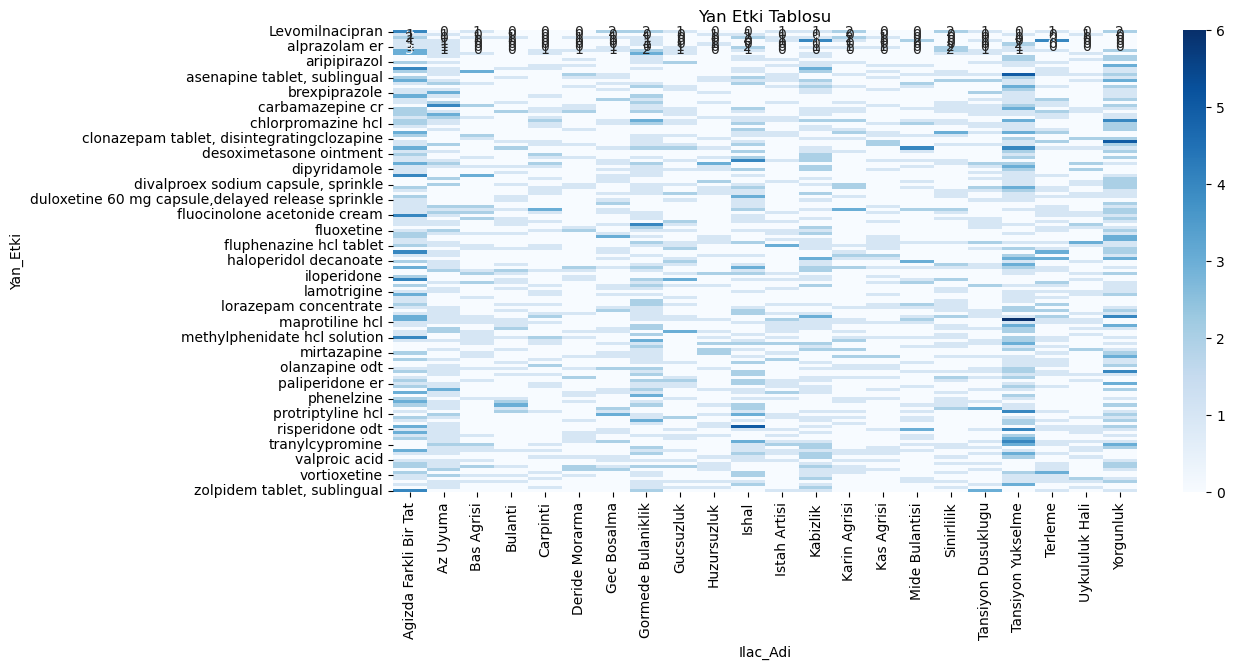

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(kontenjan_tablosu, annot=True, fmt='d', cmap='Blues')
plt.title('Yan Etki Tablosu')
plt.xlabel('Ilac_Adi')
plt.ylabel('Yan_Etki')
plt.show()


In [34]:
İlaç=['fluoxetine']

In [35]:
df_ilaç = df[df['Ilac_Adi'].isin(İlaç)]

In [36]:
kontenjan_tablosu2 = pd.crosstab(df_ilaç['Ilac_Adi'], df_ilaç['Yan_Etki'])
print(kontenjan_tablosu2)

Yan_Etki    Agizda Farkli Bir Tat  Az Uyuma  Carpinti  Deride Morarma  \
Ilac_Adi                                                                
fluoxetine                      1         2         1               2   

Yan_Etki    Gormede Bulaniklik  Gucsuzluk  Ishal  Istah Artisi  Kabizlik  \
Ilac_Adi                                                                   
fluoxetine                   1          1      1             1         1   

Yan_Etki    Terleme  Yorgunluk  
Ilac_Adi                        
fluoxetine        1          2  


In [37]:
kontenjan_tablosu3=pd.crosstab(df['Boy'], df['Yan_Etki'])

In [38]:
kontenjan_tablosu3.shape==(39,22)

print(kontenjan_tablosu3)

Yan_Etki  Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  Bulanti  Carpinti  \
Boy                                                                        
145.0                         4         1           0        3         0   
146.0                         2         2           1        1         1   
147.0                         5         1           0        0         0   
149.0                         2         0           1        0         1   
150.0                        10         5           3        4         7   
152.0                         1         0           0        1         1   
153.0                         8         6           4        2         0   
155.0                         3         4           1        1         2   
156.0                         2         5           0        2         1   
158.0                         8         5           3        2         5   
160.0                         4         2           2        4         1   
162.0       

In [39]:
Alerji=['Muz']
df_alerji=df[df['Alerjilerim'].isin(Alerji)]
tablo3=pd.crosstab(df_alerji['Alerjilerim'], df_alerji['Yan_Etki'])
tablo3
        

Yan_Etki,Agizda Farkli Bir Tat,Az Uyuma,Bas Agrisi,Bulanti,Carpinti,Deride Morarma,Gec Bosalma,Gormede Bulaniklik,Huzursuzluk,Ishal,Istah Artisi,Kabizlik,Karin Agrisi,Kas Agrisi,Mide Bulantisi,Sinirlilik,Tansiyon Yukselme,Terleme,Uykululuk Hali,Yorgunluk
Alerjilerim,,,,,,,,,,,,,,,,,,,,
Muz,7,4,1,2,5,2,2,3,1,2,1,5,2,2,2,6,8,3,2,7


In [62]:
YanEtki=['Agizda Farkli Bir Tat']
df_yanetki=df[df['Yan_Etki'].isin(YanEtki)]
tablo4=pd.crosstab(df_yanetki['Yan_Etki'], df_ilaç['Ilac_Adi'])
tablo4

Ilac_Adi,fluoxetine
Yan_Etki,
Agizda Farkli Bir Tat,1


In [41]:
df['Ilac_Baslangic_Tarihi'] = pd.to_datetime(df['Ilac_Baslangic_Tarihi'])
df['Ilac_Bitis_Tarihi'] = pd.to_datetime(df['Ilac_Bitis_Tarihi'])
df['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(df['Yan_Etki_Bildirim_Tarihi'])

In [42]:
df['Tedavi_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

In [43]:
df['Bildirim_Suresi'] = (df['Yan_Etki_Bildirim_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

In [44]:
df_ilaç.loc[:, 'Ilac_Baslangic_Tarihi'] = pd.to_datetime(df_ilaç['Ilac_Baslangic_Tarihi'], errors='coerce')
df_ilaç.loc[:, 'Ilac_Bitis_Tarihi'] = pd.to_datetime(df_ilaç['Ilac_Bitis_Tarihi'], errors='coerce')
df_ilaç.loc[:, 'Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(df_ilaç['Yan_Etki_Bildirim_Tarihi'], errors='coerce')

In [45]:
df_ilaç = df_ilaç.dropna(subset=['Yan_Etki_Bildirim_Tarihi', 'Ilac_Baslangic_Tarihi'])

In [46]:
df_ilaç['Yan_Etki_Bildirim_Suresi'] = (df_ilaç['Yan_Etki_Bildirim_Tarihi'] - df_ilaç['Ilac_Baslangic_Tarihi']).dt.days

In [47]:
ortalama_yanetki=df_ilaç['Yan_Etki_Bildirim_Suresi']

In [48]:
ortalama_yanetki.mean()

32.42857142857143

In [49]:
print(f"{İlaç} için ortalama bildirim süresi: {ortalama_yanetki.mean()} gün")

['fluoxetine'] için ortalama bildirim süresi: 32.42857142857143 gün


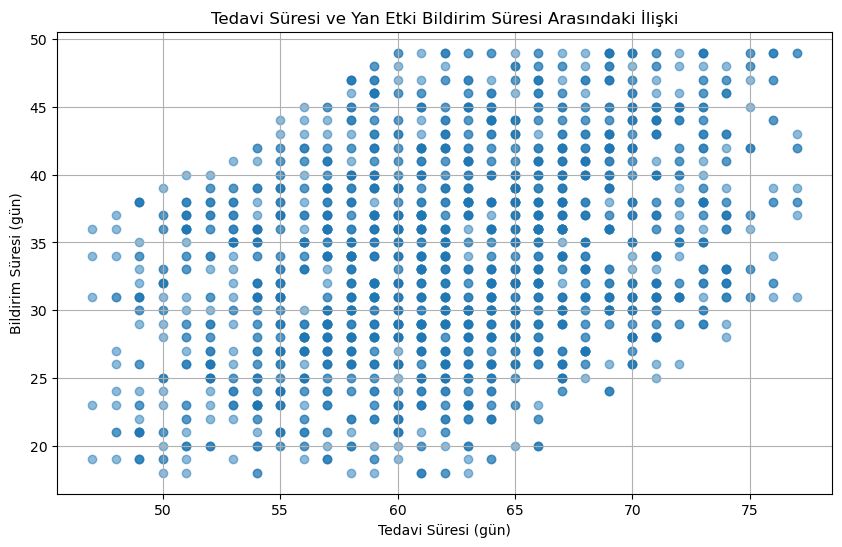

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tedavi_Suresi'], df['Bildirim_Suresi'], alpha=0.5)
plt.title('Tedavi Süresi ve Yan Etki Bildirim Süresi Arasındaki İlişki')
plt.xlabel('Tedavi Süresi (gün)')
plt.ylabel('Bildirim Süresi (gün)')
plt.grid()
plt.show()

In [51]:
korelasyon = df['Tedavi_Suresi'].corr(df['Bildirim_Suresi'])
print(f"Korelasyon Katsayısı: {korelasyon}")

Korelasyon Katsayısı: 0.3541556036287355


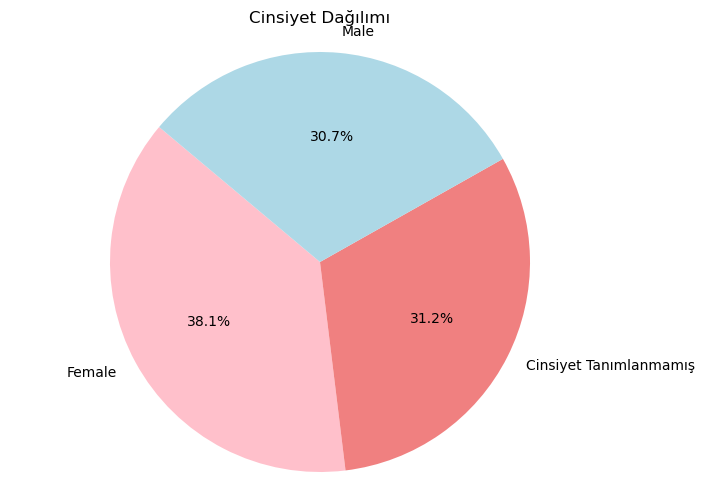

In [52]:
cinsiyet_counts = df['Cinsiyet'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cinsiyet_counts, labels=cinsiyet_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'lightcoral','lightblue'])

plt.axis('equal')  

plt.title('Cinsiyet Dağılımı')
plt.show()

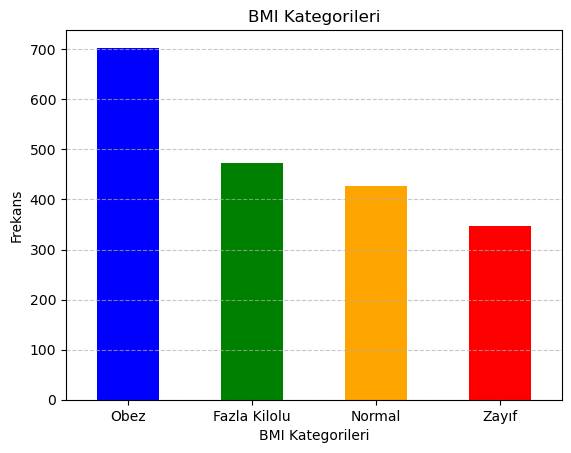

In [63]:
df['BMI'] = df['Kilo'] / (df['Boy'] / 100) ** 2
def categorize_bmi(bmi):
    if bmi <= 18.5:
        return 'Zayıf'
    elif 18.5 < bmi <= 24.9:
        return 'Normal'
    elif 25 < bmi <= 29.9:
        return 'Fazla Kilolu'
    else:
        return 'Obez'
df['BMI Kategorisi'] = df['BMI'].apply(categorize_bmi)
bmi_counts = df['BMI Kategorisi'].value_counts()
bmi_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('BMI Kategorileri')
plt.xlabel('BMI Kategorileri')
plt.ylabel('Frekans')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

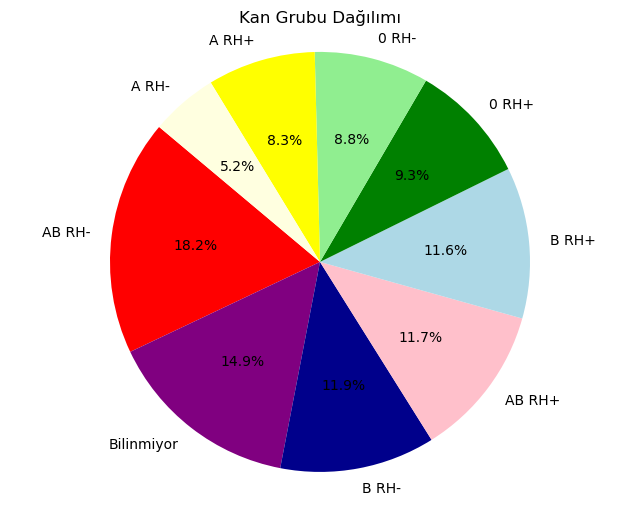

In [54]:
kangrubu_counts = df['Kan Grubu'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(kangrubu_counts, labels=kangrubu_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'purple','darkblue','pink','lightblue','green','lightgreen','yellow','lightyellow'])

plt.axis('equal')  

plt.title('Kan Grubu Dağılımı')
plt.show()

<Axes: xlabel='Yan_Etki'>

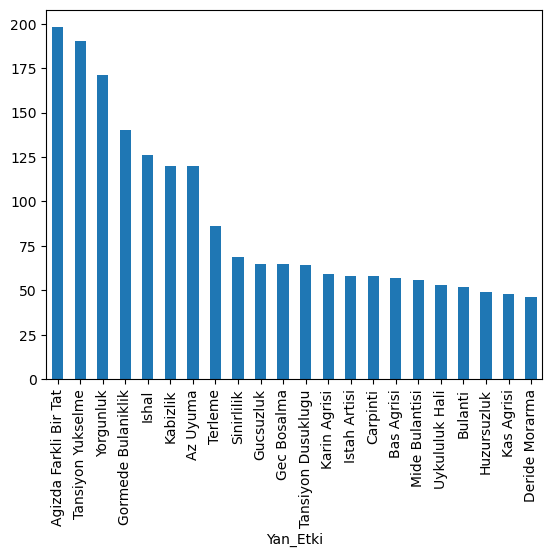

In [55]:
df['Yan_Etki'].value_counts().plot(kind='bar')


In [56]:
df['Yas'] = (pd.to_datetime('today') - pd.to_datetime(df['Dogum_Tarihi'])).dt.days // 365


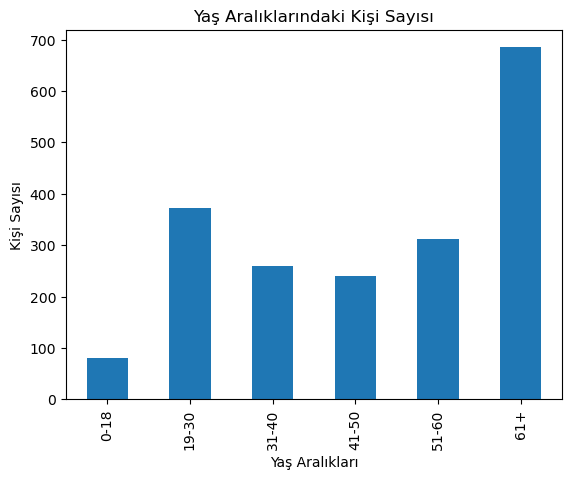

In [57]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
df['Yas_Araligi'] = pd.cut(df['Yas'], bins=bins, labels=labels, right=False)
yas_gruplari = df['Yas_Araligi'].value_counts().sort_index()
yas_gruplari.plot(kind='bar', title='Yaş Aralıklarındaki Kişi Sayısı', xlabel='Yaş Aralıkları', ylabel='Kişi Sayısı')
plt.show()

In [58]:
tablo5=pd.crosstab(df['Yas_Araligi'],df['Alerjilerim'])

In [59]:
tablo5

Alerjilerim,Bal,Balik,Bilinen Alerjisi Yok,Bugday,Ceviz,Cikolata,Deniz Urunler,Domates,Elma,Havyar,...,Kefir,Kopek,Laktoz,Lateks,Muz,Pancar,Sari Kantaron,Sut,Toz,Yogurt
Yas_Araligi,,,,,,,,,,,,,,,,,,,,,
0-18,0,16,0,0,0,0,16,0,0,27,...,0,0,0,0,0,0,0,0,0,0
19-30,0,35,62,20,0,23,0,18,3,0,...,12,0,15,13,0,0,14,0,16,32
31-40,18,13,58,0,0,10,16,23,0,13,...,10,20,0,0,13,16,15,11,0,0
41-50,0,0,66,0,0,8,9,13,9,7,...,12,11,12,11,14,0,28,0,0,12
51-60,11,0,61,11,0,12,11,29,8,0,...,11,0,11,0,0,11,12,0,10,0
61+,14,22,131,0,17,0,26,14,33,23,...,20,33,0,8,40,39,6,16,44,45


In [60]:
tablo6=pd.crosstab(df['Yas_Araligi'],df['Yan_Etki'])

In [61]:
tablo6

Yan_Etki,Agizda Farkli Bir Tat,Az Uyuma,Bas Agrisi,Bulanti,Carpinti,Deride Morarma,Gec Bosalma,Gormede Bulaniklik,Gucsuzluk,Huzursuzluk,...,Kabizlik,Karin Agrisi,Kas Agrisi,Mide Bulantisi,Sinirlilik,Tansiyon Dusuklugu,Tansiyon Yukselme,Terleme,Uykululuk Hali,Yorgunluk
Yas_Araligi,,,,,,,,,,,,,,,,,,,,,
0-18,8,8,3,3,2,4,2,4,3,2,...,3,0,1,0,1,5,8,6,1,6
19-30,42,24,10,14,8,10,13,24,12,12,...,19,16,13,9,8,12,36,19,11,30
31-40,28,17,8,5,7,2,4,18,7,7,...,17,3,4,16,13,10,28,10,7,23
41-50,23,12,8,8,10,5,11,21,4,3,...,20,5,5,7,11,6,20,11,5,25
51-60,32,18,7,6,11,4,12,16,19,14,...,16,7,5,7,15,9,28,14,7,33
61+,65,41,21,16,20,21,23,57,20,11,...,45,28,20,17,21,22,70,26,22,54
